<a href="https://colab.research.google.com/github/haytham918/low-rank-expectile/blob/main/LRE_ActualData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/low-rank-expectile/heartrate_seconds_merged.csv")

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Round each time down to the 5-min interval
df['Time'] = df['Time'].dt.floor('5min')

# Create a new column with just the Date
df['Date'] = df['Time'].dt.date

# Create a new column for the 5-minute interval index
df['Interval'] = df['Time'].dt.strftime('%H:%M')

# Group by 'Id', 'Date', and 'Interval' then calculate median
# Unstack such that level[0] is Id and level[1] is Date
df_median = df.groupby(['Id', 'Date', 'Interval'])['Value'].median().unstack(level=[0,1])

# Reindex to include all 5-minute intervals over a day and missing values with Nan
all_intervals = pd.date_range(start='00:00', end='23:55', freq='5min').strftime('%H:%M')
df_median = df_median.reindex(all_intervals)

df_median.head(200)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Round each time down to the 5-min interval
df['Time'] = df['Time'].dt.floor('5min')

# Create a new column with just the Date
df['Date'] = df['Time'].dt.date

# Create a new column for the 5-minute interval index
df['Interval'] = df['Time'].dt.strftime('%H:%M')

# Group by 'Id', 'Date', and 'Interval' then calculate median
# Unstack such that level[0] is Id and level[1] is Date
df_median = df.groupby(['Id', 'Date', 'Interval'])['Value'].median().unstack(level=[0,1])

# Reindex to include all 5-minute intervals over a day and missing values with Nan
all_intervals = pd.date_range(start='00:00', end='23:55', freq='5min').strftime('%H:%M')
df_median = df_median.reindex(all_intervals)

df_median.head(200)

KeyboardInterrupt: 

In [ ]:
# Save the processed dataframe's matrix values as a csv to save time next time
va = df_median.values
processed_dataframe = pd.DataFrame(va)
processed_dataframe.to_csv("/content/drive/MyDrive/low-rank-expectile/processed_heartrate.csv", index=False)

Matrix shape is : (288, 334)
Number of Missing values:  28674
Proportion of Missing values:  29.809131736526943 %
Index of the interval where there is no data at all:  (array([], dtype=int64),)


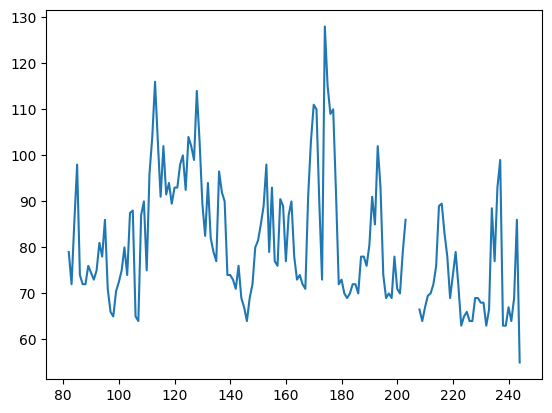

In [ ]:
processed_df = pd.read_csv("/content/drive/MyDrive/low-rank-expectile/processed_heartrate.csv")
# Convert the df to numpy matrix
user_times_matrix = processed_df.values
# Nan Mask Matrix for the matrix
nan_mask = np.isnan(user_times_matrix)

number_missing = np.sum(nan_mask)
matrix_shape = user_times_matrix.shape
print("Matrix shape is :", matrix_shape)
print("Number of Missing values: ", number_missing)
print("Proportion of Missing values: ", number_missing / (matrix_shape[0] * matrix_shape[1]) * 100, "%")

# Check if there is any interval that there is no data from any user
print("Index of the interval where there is no data at all: ", np.where(nan_mask.sum(axis=1) == matrix_shape[1]))
# Get the masked matrix so that we ignore nan values
masked_matrix = np.ma.array(user_times_matrix, mask=nan_mask)
# print(np.mean(masked_matrix, axis=1)[287])
interval_array = np.arange(0, 288)
plt.plot(interval_array, user_times_matrix[:,22])

In [ ]:
# Convert the df to numpy matrix
user_times_matrix = processed_df.values
# Nan Mask Matrix for the matrix
nan_mask = np.isnan(user_times_matrix)

number_missing = np.sum(nan_mask)
matrix_shape = user_times_matrix.shape
print("Matrix shape is :", matrix_shape)
print("Number of Missing values: ", number_missing)
print("Proportion of Missing values: ", number_missing / (matrix_shape[0] * matrix_shape[1]) * 100, "%")

# Check if there is any interval that there is no data from any user
print("Index of the interval where there is no data at all: ", np.where(nan_mask.sum(axis=1) == matrix_shape[1]))
# Get the masked matrix so that we ignore nan values
masked_matrix = np.ma.array(user_times_matrix, mask=nan_mask)
# print(np.mean(masked_matrix, axis=1)[287])

Matrix shape is : (288, 334)
Number of Missing values:  28674
Proportion of Missing values:  29.809131736526943 %
Index of the interval where there is no data at all:  (array([], dtype=int64),)


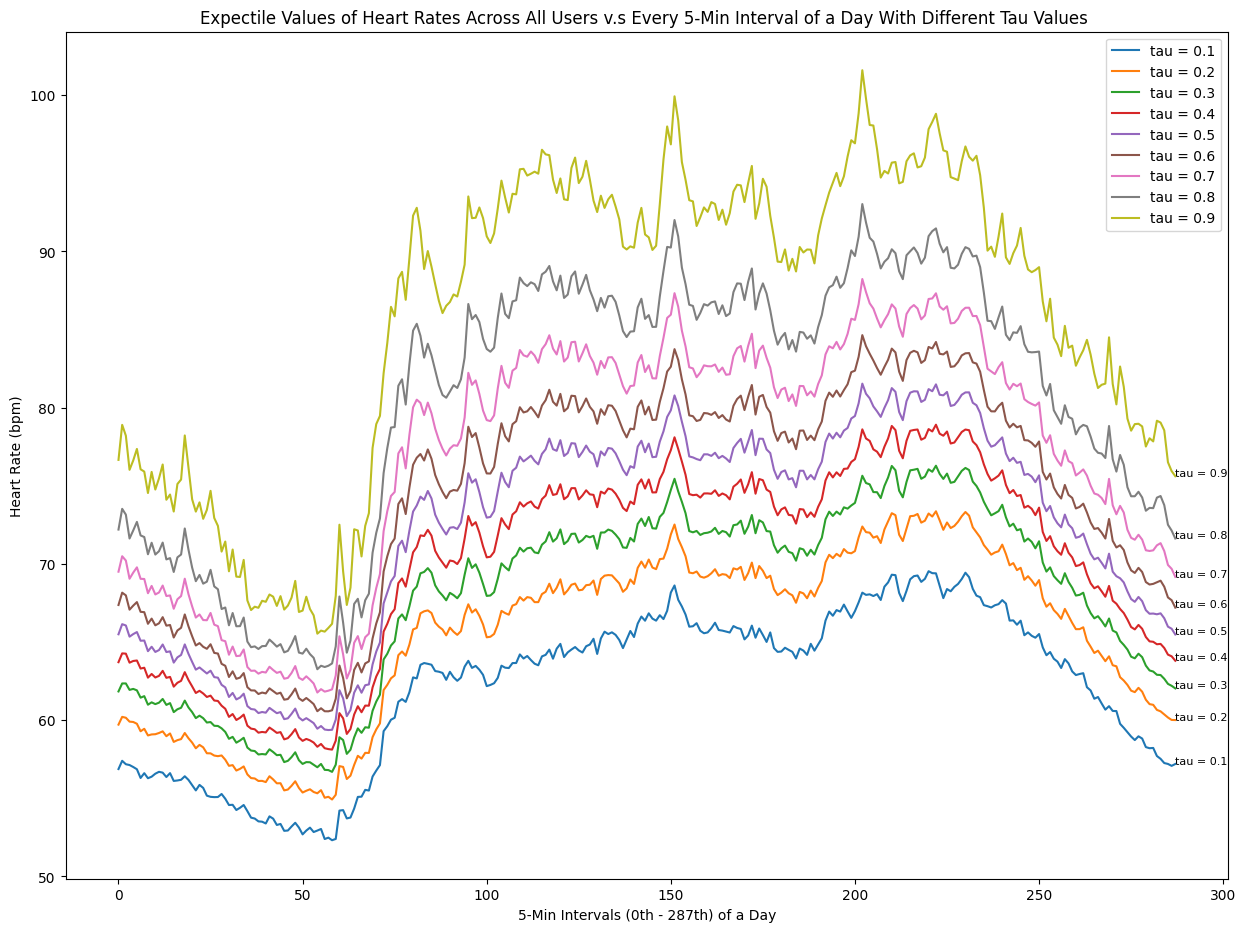

In [ ]:
interval_array = np.arange(0, 288)
plt.figure(figsize=(15,11))
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("5-Min Intervals (0th - 287th) of a Day")
plt.title("Expectile Values of Heart Rates Across All Users v.s Every 5-Min Interval of a Day With Different Tau Values ")
# Use a for loop and plot the expectiles at each interval for tau = 0 to 1
expectiles_array = []
for tau in np.arange(0.1, 1, 0.1):
  current_expectile_array = []
  for m in range(user_times_matrix.shape[0]):
    # Get the values at this time and exclude missing values
    time_row = user_times_matrix[m];
    exclude_na = time_row[~np.isnan(time_row)]

    # Calculate the expectile value at this time, append to the current_expectile
    expectile_val = scipy.stats.expectile(exclude_na, tau)
    current_expectile_array.append(expectile_val)

  # Plot this curve for each expectile val, also append to overall expectiles array
  plt.plot(interval_array, current_expectile_array, label=f"tau = {round(tau, 2)}")
  plt.annotate(f"tau = {round(tau,2)}" ,xy=(interval_array[-1], current_expectile_array[-1]), fontsize=8)
  expectiles_array.append(current_expectile_array)

plt.legend()